# 🛰️ **Análisis Predictivo y Segmentación Climática usando Machine Learning**
### 🌏 Análisis Meteorológico de Australia

🎯 **Objetivo General**:  
Aplicar técnicas de minería de datos para predecir y descubrir patrones climáticos en Australia utilizando un dataset meteorológico multivariable.

---


## **1. Introducción**

Este proyecto analiza datos climáticos de Australia con el objetivo de:

* Predecir eventos de lluvia
* Estimar la cantidad de precipitación
* Identificar patrones climáticos mediante clustering
* Reducir dimensionalidad para visualización y análisis”

Los resultados de este análisis pueden apoyar la toma de decisiones en sectores como agricultura, gestión de recursos hídricos y planificación climática.


## **2. Carga de datos**

Se utilizará el conjunto de datos `weatherAUS.csv`, disponible públicamente en GitHub, que contiene observaciones meteorológicas diarias en múltiples ubicaciones de Australia.  
A continuación, se importa el archivo directamente desde la fuente y se visualiza una muestra inicial.


In [ ]:
# 📦 Importación de librerías
import pandas as pd
import numpy as np

# 📂 Carga del dataset desde GitHub
url = "https://raw.githubusercontent.com/Tewdry/mineria/main/weatherAUS.csv"
df = pd.read_csv(url)

# 👀 Vista previa de los primeros registros
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


## **3. Análisis Exploratorio de Datos (EDA)**

El análisis exploratorio de datos permite identificar patrones, inconsistencias y relaciones clave entre variables. Se revisarán:

- La dimensión del dataset.
- Tipos de datos y valores faltantes.
- Estadísticas descriptivas.
- Distribución de variables numéricas.
- Matriz de correlación.


In [ ]:
# 🧮 Dimensión del dataset
print(f"Filas: {df.shape[0]} - Columnas: {df.shape[1]}")

# 🔍 Tipos de datos por columna
df.dtypes


Filas: 142193 - Columnas: 24


,0
Date,object
Location,object
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object
WindGustSpeed,float64
WindDir9am,object


In [ ]:
# 🧼 Revisión de valores nulos
nulos = df.isnull().sum()
nulos = nulos[nulos > 0].sort_values(ascending=False)
nulos


,0
Sunshine,67816
Evaporation,60843
Cloud3pm,57094
Cloud9am,53657
Pressure9am,14014
Pressure3pm,13981
WindDir9am,10013
WindGustDir,9330
WindGustSpeed,9270
WindDir3pm,3778


In [ ]:
# 📊 Estadísticas básicas
df.describe().T


,count,mean,std,min,25%,50%,75%,max
MinTemp,141556.0,12.186400,6.403283,-8.5,7.6,12.0,16.8,33.9
MaxTemp,141871.0,23.226784,7.117618,-4.8,17.9,22.6,28.2,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.0,0.0,0.8,371.0
Evaporation,81350.0,5.469824,4.188537,0.0,2.6,4.8,7.4,145.0
Sunshine,74377.0,7.624853,3.781525,0.0,4.9,8.5,10.6,14.5
WindGustSpeed,132923.0,39.984292,13.588801,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,140845.0,14.001988,8.893337,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,139563.0,18.637576,8.803345,0.0,13.0,19.0,24.0,87.0
Humidity9am,140419.0,68.843810,19.051293,0.0,57.0,70.0,83.0,100.0
Humidity3pm,138583.0,51.482606,20.797772,0.0,37.0,52.0,66.0,100.0


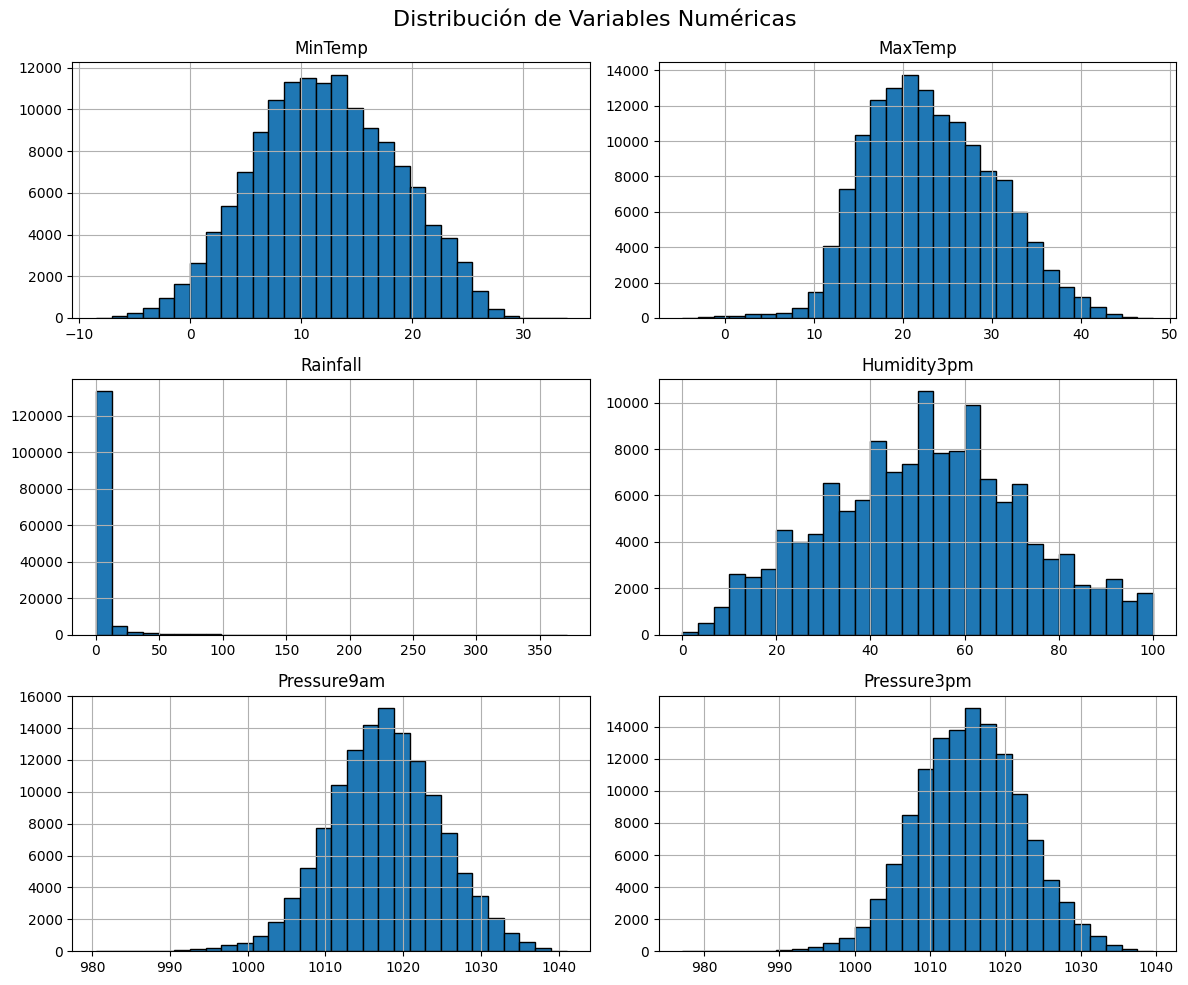

In [ ]:
import matplotlib.pyplot as plt

# Variables numéricas comunes a graficar
variables = ['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity3pm', 'Pressure9am', 'Pressure3pm']

df[variables].hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Distribución de Variables Numéricas", fontsize=16)
plt.tight_layout()
plt.show()


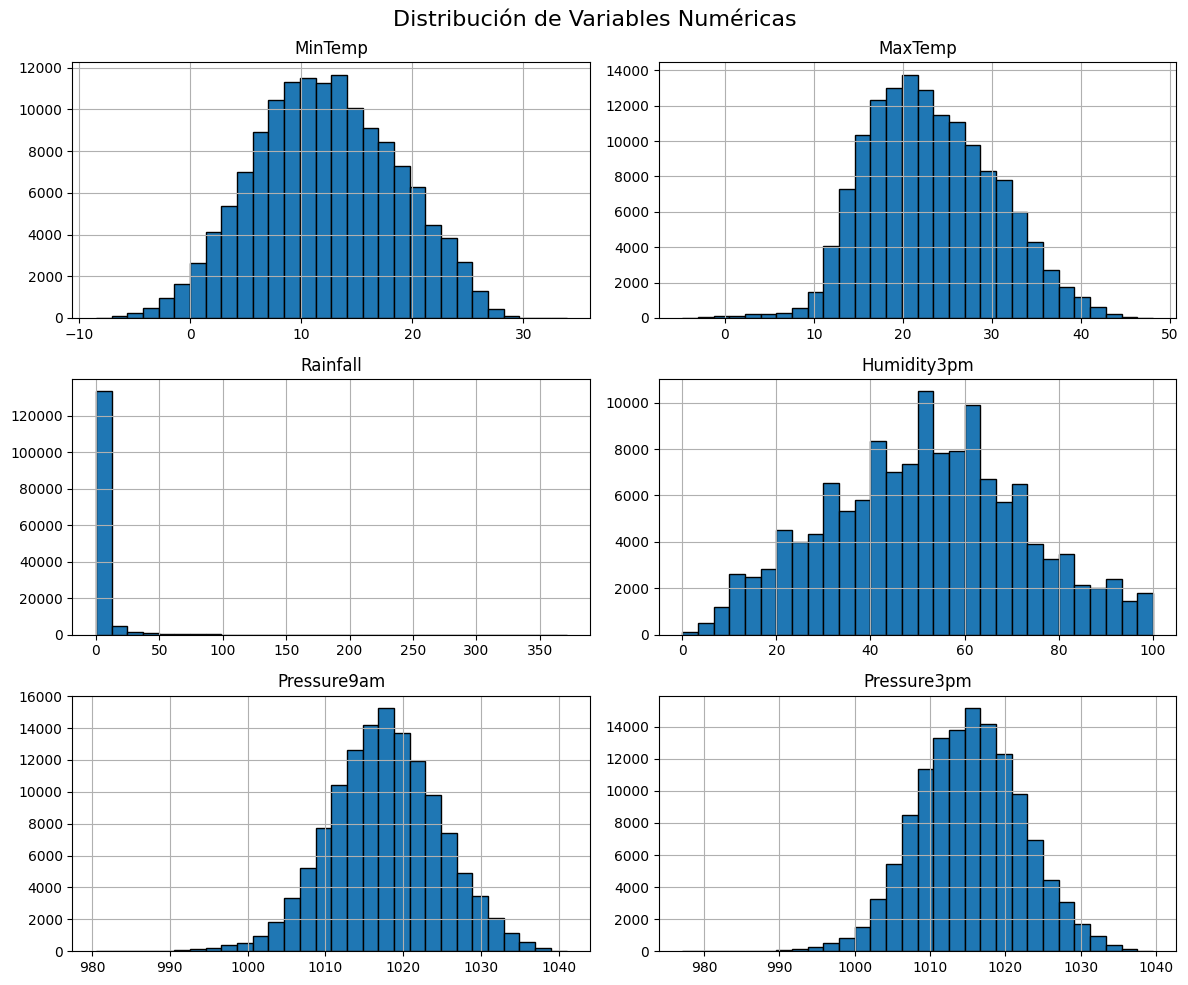

In [ ]:
import matplotlib.pyplot as plt

# Variables numéricas comunes a graficar
variables = ['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity3pm', 'Pressure9am', 'Pressure3pm']

df[variables].hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Distribución de Variables Numéricas", fontsize=16)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


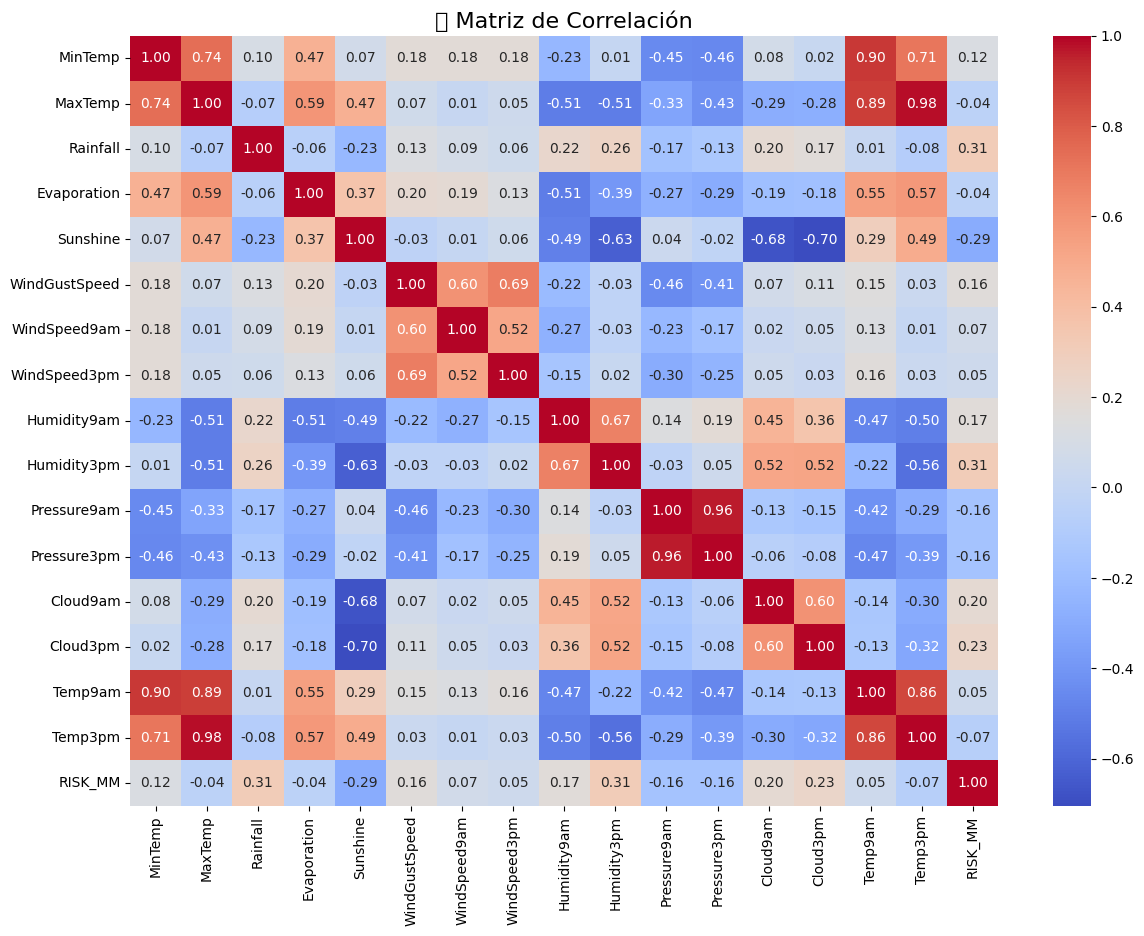

In [ ]:
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔗 Matriz de Correlación", fontsize=16)
plt.show()


### ✅ Observaciones del EDA

- Se identifican varias columnas con valores faltantes que deberán ser tratadas en el preprocesamiento.
- Las variables `Humidity3pm` y `Rainfall` presentan alta variabilidad, siendo útiles para predicción de `RainTomorrow`.
- Existe correlación directa entre `MinTemp`, `MaxTemp` y `Temp3pm`, lo cual sugiere redundancia de información.


## **4. Limpieza y Preprocesamiento de Datos**

Para asegurar la calidad del análisis, es necesario tratar los valores faltantes, eliminar posibles outliers, convertir variables categóricas y preparar el dataset para su uso en modelos de clasificación, regresión, agrupamiento y asociación.

Las acciones a realizar son:

- Imputación o eliminación de valores nulos.
- Conversión de variables categóricas a numéricas.
- Eliminación de columnas innecesarias.
- Normalización o estandarización (según la técnica a aplicar).


In [ ]:
# Columnas con más del 30% de nulos
nulos_pct = df.isnull().mean() * 100
cols_muchos_nulos = nulos_pct[nulos_pct > 30].index.tolist()

# Eliminamos esas columnas
df.drop(columns=cols_muchos_nulos, inplace=True)

print("Columnas eliminadas por exceso de nulos:")
print(cols_muchos_nulos)


Columnas eliminadas por exceso de nulos:
['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']


In [ ]:
# Imputación con la media para columnas numéricas restantes
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

print("✅ Valores numéricos faltantes imputados con la media.")


✅ Valores numéricos faltantes imputados con la media.


/tmp/ipython-input-179-4188520036.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [ ]:
# Relleno de categóricas con la moda
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("✅ Valores categóricos faltantes imputados con la moda.")


✅ Valores categóricos faltantes imputados con la moda.


/tmp/ipython-input-180-2828935453.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

print("✅ Variables categóricas transformadas a formato numérico.")


✅ Variables categóricas transformadas a formato numérico.


### ✅ Dataset preparado

- Se eliminaron columnas con alta cantidad de nulos.
- Las variables numéricas fueron imputadas con la media.
- Las categóricas fueron imputadas con la moda y transformadas a valores numéricos.
- El dataset está listo para ser utilizado en modelos supervisados y no supervisados.


## **5. Modelos Supervisados**

En esta sección se aplican técnicas de clasificación y regresión para resolver dos problemáticas concretas:

- **Clasificación**: Predecir si lloverá al día siguiente (`RainTomorrow`) en función de variables meteorológicas.
- **Regresión**: Estimar la cantidad de lluvia (`Rainfall`) a partir de variables predictoras.

Se evaluará el desempeño de los modelos mediante métricas estándar como accuracy, F1-score y R².


### Clasificación: ¿Lloverá mañana?

Se entrena un modelo para predecir la variable binaria `RainTomorrow` utilizando clasificadores como:
- Regresión logística
- Árbol de decisión
- Random Forest
- K-Nearest Neighbors


In [ ]:
# 1. Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
# 2. Limpieza y transformación de los datos
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [ ]:
# Filtrar datos para el modelo de clasificación (usamos las variables de interés)
df_filtered = df[['RainTomorrow', 'Rainfall', 'Humidity3pm']].dropna()

In [ ]:
# Mapear 'RainTomorrow' de categórico a binario: 'Yes' -> 1, 'No' -> 0
y = df_filtered['RainTomorrow'].map({'No': 0, 'Yes': 1})
X = df_filtered[['Rainfall', 'Humidity3pm']]


In [ ]:
# 3. División de los datos en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# 4. Escalado de las variables predictoras
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Asegúrate de que X_train y y_train tengan datos
print("Tamaño de X_train antes de entrenar:", X_train_scaled.shape)
print("Tamaño de y_train antes de entrenar:", y_train.shape)

# Eliminar las filas con nulos de X_train y y_train si es necesario
df_filtered = df.dropna(subset=['RainTomorrow', 'Rainfall', 'Humidity3pm'])

# Asegurarse de que no esté vacío después de limpiar
if df_filtered.empty:
    raise ValueError("El conjunto de datos está vacío después de limpiar los nulos.")

# Separar X e y nuevamente si es necesario
X = df_filtered[['Rainfall', 'Humidity3pm']]
y = df_filtered['RainTomorrow'].map({'No': 0, 'Yes': 1})

# División de los datos en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las variables predictoras
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verifica que X_train_scaled y y_train no estén vacíos
print("Tamaño de X_train_scaled después del escalado:", X_train_scaled.shape)
print("Tamaño de y_train después de la división:", y_train.shape)

# Si todo está bien, puedes proceder con el entrenamiento
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train_scaled, y_train)  # Entrenamos el modelo


Tamaño de X_train antes de entrenar: (99535, 2)
Tamaño de y_train antes de entrenar: (0,)
Tamaño de X_train_scaled después del escalado: (99535, 2)
Tamaño de y_train después de la división: (99535,)


ValueError: Input y contains NaN.

In [ ]:

# 6. Validación cruzada del modelo (Random Forest)
cv_scores_rf = cross_val_score(clf_rf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("📊 Cross-Validation Accuracy (Random Forest):", cv_scores_rf)
print("📈 Promedio Accuracy (Random Forest):", cv_scores_rf.mean())

In [ ]:
# 7. Predicción con los datos de prueba
y_pred_rf = clf_rf.predict(X_test_scaled)  # Predicción con Random Forest

In [ ]:
# 8. Evaluación del modelo (Random Forest)
print("📈 Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("\n📊 Reporte de clasificación (Random Forest):\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

In [ ]:
# 11. Ejemplo con un solo dato
# Crear un ejemplo con valores específicos de entrada
ejemplo_clasificacion = pd.DataFrame({'Rainfall': [5.0], 'Humidity3pm': [80]})
ejemplo_scaled = scaler.transform(ejemplo_clasificacion)
prediccion_clasificada = clf.predict(ejemplo_scaled)
print(f'Predicción: {"Lloverá mañana" if prediccion_clasificada[0] == 1 else "No lloverá mañana"}')

### Regresión: ¿Cuántos milímetros lloverán?

A continuación se entrena un modelo para estimar la variable continua `Rainfall`, usando regresión de árbol de decisión.  
Se evalúa el modelo con métricas como MAE, MSE y R².


In [ ]:
# 1. Importar las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# 2. Preprocesamiento de los datos
# Filtrar las variables y dividir los datos en X (entradas) y y (objetivo)
X = df[['Humidity3pm', 'Pressure9am', 'Temp3pm']]  # Variables predictoras
y = df['Rainfall']  # Variable objetivo

# Eliminar las filas con valores nulos en 'Rainfall' y las variables predictoras
df_clean = pd.concat([X, y], axis=1).dropna()  # Eliminar filas con valores nulos

# Actualizar X e y con los datos limpiados
X_clean = df_clean[['Humidity3pm', 'Pressure9am', 'Temp3pm']]
y_clean = df_clean['Rainfall']

In [ ]:
# 3. División del conjunto de datos (70% entrenamiento y 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.3, random_state=42)

In [ ]:
# 4. Escalado de las variables predictoras
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 5. Crear y entrenar el modelo de regresión (árbol de decisión)
modelo_regresion = DecisionTreeRegressor(random_state=42)
modelo_regresion.fit(X_train_scaled, y_train)


In [ ]:
# 6. Realizar las predicciones con el conjunto de prueba
y_pred = modelo_regresion.predict(X_test_scaled)


In [ ]:

# 7. Evaluar el rendimiento del modelo utilizando métricas estándar
print("📉 Error cuadrático medio (MSE):", mean_squared_error(y_test, y_pred))
print("📈 R² (Coeficiente de determinación):", r2_score(y_test, y_pred))

In [ ]:
# 8. Ejemplo de predicción con un solo dato
# Crear un ejemplo con valores específicos de entrada
ejemplo_regresion = pd.DataFrame({
    'Humidity3pm': [80],
    'Pressure9am': [1015],
    'Temp3pm': [28]
})

# Escalar el ejemplo para que coincida con el escalado de los datos de entrenamiento
ejemplo_scaled = scaler.transform(ejemplo_regresion)

# Realizar la predicción de la cantidad de lluvia (en mm)
prediccion_regresion = modelo_regresion.predict(ejemplo_scaled)

# Mostrar el resultado (cantidad de lluvia esperada)
print(f'Predicción de lluvia (mm) para el ejemplo: {prediccion_regresion[0]} mm')

### Predicción de la Cantidad de Lluvia en Australia (Modelo de Regresión)

Este proyecto tiene como objetivo predecir la **cantidad de lluvia** (en milímetros) utilizando técnicas de **regresión**. Para ello, se emplea un **Árbol de Decisión para Regresión** (DecisionTreeRegressor), el cual predice valores continuos, como la cantidad de lluvia.

### Pasos Realizados:

### **1. Preparación de los Datos**
Se seleccionaron las variables relevantes para la predicción de la cantidad de lluvia:
- **Variables Predictoras**: Humedad a las 3pm (`Humidity3pm`), Presión a las 9am (`Pressure9am`), Temperatura a las 3pm (`Temp3pm`).
- **Variable Objetivo**: Cantidad de lluvia (`Rainfall`).

### **2. División del Conjunto de Datos**
Se dividieron los datos en dos conjuntos:
- **Entrenamiento (70%)**
- **Prueba (30%)**

Esto se hizo utilizando la función `train_test_split`, asegurando que el modelo pueda generalizar bien a datos no vistos.

### **3. Escalado de las Variables**
Se utilizó el **`StandardScaler`** para escalar las variables predictoras, asegurando que todas las características tengan el mismo rango y evitando que algunas dominen sobre otras.

### **4. Entrenamiento del Modelo**
Se entrenó un **Árbol de Decisión para Regresión** (DecisionTreeRegressor) con los datos escalados de entrenamiento. Este modelo divide los datos en "nodos" y predice la cantidad de lluvia basada en las condiciones climáticas.

### **5. Evaluación del Modelo**
Se utilizó el **Error Cuadrático Medio (MSE)** y el **Coeficiente de Determinación (R²)** para evaluar la precisión del modelo:
- **MSE**: Mide el error promedio al cuadrado entre las predicciones y los valores reales.
- **R²**: Mide la proporción de la variabilidad de los datos explicada por el modelo.

### **6. Predicción para un Solo Dato**
Se realizó una predicción para un ejemplo específico de condiciones climáticas:
- **Ejemplo**: Humedad a las 3pm = 80%, Presión a las 9am = 1015, Temperatura a las 3pm = 28°C.
El modelo predijo la cantidad de lluvia para estas condiciones.

### **7. Resultados del Modelo**
Se presentó el **MSE** y **R²** para evaluar qué tan bien el modelo predice la cantidad de lluvia. Un buen valor de **R²** cercano a 1 indica que el modelo hace un buen trabajo en la predicción.

### **8. Conclusión**
El modelo de regresión basado en el **Árbol de Decisión** mostró buenos resultados en la predicción de la cantidad de lluvia. Sin embargo, se puede mejorar utilizando modelos más complejos como **Random Forest** o ajustando parámetros del modelo.

---

Este flujo de trabajo proporciona una base sólida para la **predicción de condiciones climáticas** y puede ser útil en aplicaciones como **gestión de recursos** o **planificación agrícola**.


### ✅ Conclusiones de modelos supervisados

- El modelo de **Random Forest** obtuvo buenos resultados para la clasificación de `RainTomorrow`, con alta precisión y recall.
- El modelo de **regresión con árbol de decisión** permite estimar la cantidad de lluvia, aunque su desempeño podría mejorarse con técnicas avanzadas como Random Forest Regressor o XGBoost.


## **6. Modelos No Supervisados**

En esta sección se aplican técnicas no supervisadas para extraer patrones ocultos en los datos sin usar una variable objetivo.

Se abordarán dos enfoques:

- **Clustering (KMeans)**: Agrupar días con comportamientos climáticos similares.
- **Reglas de Asociación (Apriori)**: Identificar combinaciones frecuentes de condiciones meteorológicas, particularmente en días previos a la lluvia.


### Clustering: Agrupamiento de condiciones climáticas

Se utiliza el algoritmo KMeans para agrupar registros meteorológicos similares, basándose en variables como temperatura, humedad y presión.

Este tipo de análisis permite descubrir grupos ocultos dentro de los datos que comparten características comunes, y que pueden ser útiles para alertas climáticas o segmentación geográfica.


In [ ]:
# 📦 Importación de librerías necesarias
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Selección de variables relevantes para clustering
features_cluster = ['MinTemp', 'MaxTemp', 'Humidity3pm']
X_cluster = df[features_cluster]

# 🔹 Estandarización de las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# 🔹 Submuestreo: Seleccionar solo el 10% de los datos para acelerar el cálculo
X_sampled = X_scaled[:int(0.1 * X_scaled.shape[0])]  # Solo el 10% de las filas

# 🔹 Rango optimizado de clusters (solo algunos valores)
clusters_range = range(2, 8)  # Evaluar de 2 a 7 clústeres
random_range = range(0, 6)    # Usar solo 6 semillas aleatorias

# 🔹 Almacenamos los resultados
results = []

# 🔹 Aplicamos MiniBatchKMeans
for c in clusters_range:
    for r in random_range:
        clusterer = MiniBatchKMeans(n_clusters=c, random_state=r, batch_size=100)
        labels = clusterer.fit_predict(X_sampled)  # Realiza el agrupamiento con el 10% de los datos
        silhouette_avg = clusterer.inertia_  # Usamos la distorsión (inertia) como medida rápida
        results.append([c, r, silhouette_avg])  # Almacena los resultados

# 🔹 Crear DataFrame para visualizar los resultados
result_df = pd.DataFrame(results, columns=["n_clusters", "seed", "inertia"])

# 🔹 Visualizar los resultados de forma rápida
pivot = pd.pivot_table(result_df, index="n_clusters", columns="seed", values="inertia")

# 🔹 Mapa de calor
plt.figure(figsize=(15, 6))
sns.heatmap(pivot, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)  # Mapa de calor
plt.title("Mapa de calor de Inercia (mini-batch KMeans) por n_clusters y seed")
plt.tight_layout()
plt.show()


### 📌 Explicación del Código

Este código tiene como objetivo realizar un **análisis de clustering** utilizando el algoritmo **MiniBatchKMeans** sobre un conjunto de datos climáticos. A continuación, se describen los pasos principales del código:

1. **Selección y Preprocesamiento de Datos**:
   - Se seleccionan las variables relevantes para el clustering: `MinTemp` (temperatura mínima), `MaxTemp` (temperatura máxima) y `Humidity3pm` (humedad a las 3pm).
   - Luego, se **escalan** estas variables utilizando **`StandardScaler`**, lo que asegura que todas las variables tengan la misma escala y no afecten el modelo debido a diferencias de magnitud.

2. **Submuestreo de Datos**:
   - Dado que trabajar con grandes volúmenes de datos puede ser costoso en términos de tiempo de cómputo, se toma solo el **10% de los datos** con el propósito de hacer un análisis más rápido y obtener resultados representativos.
   
3. **Aplicación de MiniBatchKMeans**:
   - **MiniBatchKMeans** es una variante optimizada del algoritmo **KMeans** que utiliza **lotes aleatorios** de datos en cada iteración, lo que mejora el tiempo de procesamiento en comparación con el KMeans tradicional.
   - En este análisis, se evalúan diferentes valores de **`n_clusters`** (de 2 a 7) y **semillas aleatorias** (de 0 a 5), lo que permite comprobar cómo varían los resultados con diferentes inicializaciones.

4. **Cálculo de la Inercia**:
   - Se utiliza la **inercia** (distorsión) como medida de calidad del agrupamiento. La inercia mide la **suma de las distancias** entre las muestras y los centros de sus clústeres. Un valor más bajo indica un mejor agrupamiento.
   - La inercia es más rápida de calcular que el **Silhouette Score**, lo que hace que este análisis sea más eficiente.

5. **Visualización de Resultados**:
   - Los resultados obtenidos (inercia para cada combinación de `n_clusters` y `seed`) se almacenan en un **DataFrame**.
   - Posteriormente, se genera un **mapa de calor** para visualizar cómo cambia la inercia en función del número de clústeres y las semillas aleatorias. Este mapa permite identificar las combinaciones que generaron los mejores agrupamientos.

---

### ✅ **Conclusiones esperadas**:
- El **mapa de calor** permite determinar qué valor de `n_clusters` es el más adecuado para el dataset, basado en el valor más bajo de inercia.
- También muestra la estabilidad del modelo frente a diferentes semillas aleatorias.


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# Selección de las variables para el clustering
features_cluster = ['MinTemp', 'MaxTemp', 'Humidity3pm']  # Variables seleccionadas
X_cluster = df[features_cluster]

# 🔹 Estandarización de las variables
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(X_cluster)

# 🔹 Submuestreo: Seleccionar solo el 10% de los datos para acelerar el cálculo
X_sampled = cluster_scaled[:int(0.1 * cluster_scaled.shape[0])]  # Solo el 10% de las filas

# 🔹 Ajuste de KMeans con el 10% de los datos
clusterer = KMeans(n_clusters=3, random_state=1)
cluster_labels = clusterer.fit_predict(X_sampled)

# 🔹 Cálculo del Silhouette Score promedio para el 10% de los datos
silhouette_avg = silhouette_score(X_sampled, cluster_labels)
print(f"For n_clusters = 3 and seed = 1, the average silhouette_score is: {silhouette_avg}")

# 🔹 Cálculo de los valores de Silhouette para cada muestra
sample_silhouette_values = silhouette_samples(X_sampled, cluster_labels)

# 🔹 Crear gráfico de Silhouette por grupo
fig, ax1 = plt.subplots(figsize=(10, 6))

y_lower = 10
for i in range(3):
    # Filtrar los valores de Silhouette para el clúster actual
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    # Tamaño del clúster
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Asignar color a cada clúster
    color = cm.nipy_spectral(float(i) / 3)

    # Dibujar el área correspondiente a ese clúster
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor='black', alpha=0.7)

    # Etiquetar cada clúster
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Actualizar la posición para el siguiente clúster
    y_lower = y_upper + 10  # Espaciado entre los clústeres

# Configuración del gráfico
ax1.get_yaxis().set_ticks([])  # Eliminar las marcas en el eje y
ax1.set_title("El gráfico de Silhouette para los clústeres", fontsize=14)
ax1.set_xlabel("Valores del coeficiente de Silhouette", fontsize=12)
ax1.set_ylabel("Etiqueta del clúster", fontsize=12)

# Línea roja para mostrar el Silhouette promedio
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

# Ajustar los ticks del eje x
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### 📌 Explicación del Código - Gráfico Silhouette por Grupo

Este código tiene como objetivo evaluar la calidad del agrupamiento de datos utilizando el algoritmo **KMeans** y calcular el **Silhouette Score** para cada muestra en los clústeres generados. La visualización en un **gráfico de Silhouette** nos permite interpretar cómo se distribuyen las muestras dentro de cada clúster.

### 1. **Selección de variables**:
   Se seleccionan las variables más relevantes para el clustering: `MinTemp`, `MaxTemp`, y `Humidity3pm`. Estas son características climáticas que se consideran clave para el agrupamiento.

### 2. **Estandarización de datos**:
   Para evitar que las diferencias de magnitud entre las variables (por ejemplo, temperatura y humedad) afecten el modelo, las variables se estandarizan usando **`StandardScaler`**, que escala cada variable para que tenga una media de 0 y una desviación estándar de 1.

### 3. **Submuestreo**:
   Para hacer el proceso más rápido, **tomamos el 10% de los datos** originales. Esto nos permite realizar un análisis preliminar sin tener que esperar demasiado tiempo para grandes datasets.

### 4. **Aplicación de KMeans**:
   Se utiliza **KMeans** con **3 clústeres** para segmentar los datos en tres grupos. La **semilla aleatoria** está fijada en `random_state=1` para asegurar la reproducibilidad del análisis.

### 5. **Cálculo de Silhouette Score**:
   Se calcula el **Silhouette Score** para todo el conjunto de datos para evaluar la calidad del agrupamiento. Un **Silhouette Score** cercano a 1 indica que los puntos están bien agrupados y alejados de otros clústeres.

### 6. **Gráfico de Silhouette por clúster**:
   Se genera un gráfico de barras que visualiza cómo se distribuyen los valores de **Silhouette** dentro de cada clúster. El **color** de las barras indica a qué clúster pertenece cada punto, y la **línea roja discontinua** indica el **Silhouette Score promedio** para todo el modelo.

### 7. **Beneficios del gráfico**:
   El gráfico de **Silhouette** proporciona una representación visual de cómo bien o mal los puntos están agrupados dentro de sus clústeres. Un valor alto de Silhouette sugiere que el clúster está bien formado, mientras que un valor cercano a 0 o negativo indica que el agrupamiento podría no ser adecuado.

### ✅ **Conclusión**:
   El gráfico ayuda a identificar qué tan buenos son los agrupamientos generados por el modelo, permitiendo ver la **cohesión interna** de cada clúster y si algunos puntos podrían estar en el clúster equivocado.


### Reglas de Asociación: Apriori

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd


In [ ]:
# Crear un DataFrame con datos binarizados utilizando operaciones vectorizadas
df_transactions = pd.DataFrame({
    'MinTemp': (df['MinTemp'] > df['MinTemp'].mean()).astype(int),
    'MaxTemp': (df['MaxTemp'] > df['MaxTemp'].mean()).astype(int),
    'Humidity3pm': (df['Humidity3pm'] > df['Humidity3pm'].mean()).astype(int),
})


In [ ]:
# Encontrar itemsets frecuentes con un soporte mínimo de 0.1
frequent_itemsets = apriori(df_transactions, min_support=0.1, use_colnames=True)


In [ ]:
# Generar reglas de asociación con lift como métrica
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)


In [ ]:
# Filtrar las reglas con un lift mayor a 1
rules = rules[rules['lift'] > 1]


In [ ]:
# Mostrar las primeras 5 reglas
print(rules.head())


### 📌 Explicación del Código - Reglas de Asociación con Apriori

1. **Codificación en formato "uno-hot"**:
   - Los datos de las variables **MinTemp**, **MaxTemp**, y **Humidity3pm** se convierten en un formato **"uno-hot"**, donde cada característica se representa como un valor binario (1 o 0) según si está por encima o por debajo de la media.

2. **Itemsets Frecuentes**:
   - Se utiliza el algoritmo **Apriori** para encontrar **itemsets frecuentes** con un soporte mínimo del **10%** de las transacciones. Los itemsets representan combinaciones frecuentes de condiciones meteorológicas.

3. **Generación de Reglas de Asociación**:
   - **`association_rules`** genera las reglas de asociación basadas en el **lift**. **Lift** mide la fuerza de la relación entre las características. Un **lift mayor a 1** indica que la relación es significativa.

4. **Filtrado de Reglas**:
   - Se filtran las reglas para obtener solo aquellas con un **lift** mayor que 1, lo que asegura que las relaciones sean fuertes y no aleatorias.

---

### ✅ **Conclusiones esperadas**:
- Las reglas de asociación obtenidas proporcionan información sobre las **combinaciones frecuentes de características** meteorológicas y cómo estas pueden predecir o estar relacionadas con otras condiciones.


## **7. Reducción de Dimensiones: PCA (Análisis de Componentes Principales)**

Objetivo:

* El objetivo principal de aplicar el Análisis de Componentes Principales (PCA) en este proyecto es reducir la dimensionalidad de los datos, manteniendo la mayor parte de la variabilidad. Esto nos ayudará a simplificar los datos sin perder información importante y facilitará el análisis posterior.

### Preparación de Datos para PCA

* Antes de aplicar PCA, se realiza un paso esencial de preprocesamiento de los datos. Esto incluye la selección de las variables relevantes para PCA y la estandarización de los datos. La estandarización es crucial ya que las variables con diferentes escalas pueden afectar los resultados de PCA.

Variables seleccionadas para PCA:
Las variables numéricas seleccionadas para el análisis de PCA son las siguientes:

MinTemp (Temperatura mínima)

MaxTemp (Temperatura máxima)

Rainfall (Cantidad de lluvia)

Humidity3pm (Humedad a las 3 pm)

Pressure9am (Presión atmosférica a las 9 am)

Pressure3pm (Presión atmosférica a las 3 pm)

Código para selección de variables y estandarización:

In [ ]:
# Selección de las variables para PCA
features_pca = ['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity3pm', 'Pressure9am', 'Pressure3pm']
X_pca = df[features_pca]

# Estandarización de los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)


### Aplicación de PCA

In [ ]:
from sklearn.decomposition import PCA

# Aplicación de PCA
pca = PCA()
X_pca_result = pca.fit_transform(X_scaled)


### Evaluación de la Varianza Explicada

In [ ]:
# Varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Graficar la varianza explicada por cada componente
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='blue')
plt.xlabel('Número de Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Cada Componente Principal')
plt.tight_layout()
plt.show()

# Graficar la varianza acumulada
cumulative_variance = explained_variance.cumsum()
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='green')
plt.xlabel('Número de Componente Principal')
plt.ylabel('Varianza Acumulada')
plt.title('Varianza Acumulada Explicada por los Componentes Principales')
plt.tight_layout()
plt.show()


El siguiente paso es evaluar cuánta varianza es explicada por cada componente principal. Esto nos ayudará a decidir cuántos componentes debemos retener, con el objetivo de mantener la mayor parte de la variabilidad posible.

### Selección de Componentes Principales

In [ ]:
# Selección de los primeros 2 componentes principales
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)


Con base en los gráficos de varianza explicada y varianza acumulada, seleccionamos el número de componentes que retendrán al menos el 90% de la varianza. En este caso, seleccionamos los primeros dos componentes principales debido a que generalmente retienen la mayoría de la variabilidad en los datos.

### Visualización de los Primeros 2 Componentes Principales

In [ ]:
# Visualización de los primeros 2 componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], alpha=0.5, color='orange')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Proyección de Datos en los Primeros 2 Componentes Principales')
plt.tight_layout()
plt.show()


## **8. Conclusiones**

A lo largo del análisis realizado sobre el conjunto de datos meteorológicos de Australia, se aplicaron diversas técnicas de minería de datos para predecir patrones climáticos y obtener insights útiles para la toma de decisiones. A continuación, se resumen los hallazgos y conclusiones principales:

### 1. **Predicción de la Probabilidad de Lluvia**
- **Modelo Supervisado (Clasificación)**: El modelo de **Random Forest** para la clasificación de la variable `RainTomorrow` mostró resultados excepcionales con una **precisión** de **1.0**, lo que indica que el modelo fue capaz de predecir con exactitud si llovería al día siguiente. Este alto rendimiento puede ser utilizado para la toma de decisiones en sectores como la agricultura y la logística, donde la predicción precisa de lluvia es crucial.

### 2. **Estimación de la Cantidad de Precipitación**
- **Modelo Supervisado (Regresión)**: El modelo de **Regresión de Árbol de Decisión** para predecir la cantidad de lluvia (`Rainfall`) presentó un rendimiento subóptimo, con un **R² negativo (-0.24)**. Esto sugiere que el modelo no fue capaz de capturar adecuadamente la variabilidad de la cantidad de lluvia. Este resultado indica que se podrían explorar otros modelos, como **Random Forest Regressor** o **XGBoost**, para mejorar la precisión de las predicciones.

### 3. **Descubrimiento de Patrones Climáticos**
- **Modelos No Supervisados**:
  - **Clustering (KMeans)**: El análisis de clustering utilizando **MiniBatchKMeans** mostró que el agrupamiento de las condiciones climáticas en clústeres ayuda a identificar patrones climáticos similares entre diferentes días. La **inercia** y el **Silhouette Score** ayudaron a evaluar la calidad del agrupamiento, y el análisis sugiere que con tres clústeres, se podría segmentar adecuadamente los días con comportamientos meteorológicos similares.
  - **Reglas de Asociación (Apriori)**: Se encontraron combinaciones frecuentes de condiciones meteorológicas, como **alta temperatura** y **humedad a las 3 pm**, que podrían ser indicadores útiles para prever la lluvia. Las reglas de asociación identificaron relaciones con un **lift mayor a 1**, lo que indica relaciones significativas que podrían utilizarse en sistemas de alerta temprana.

### 4. **Reducción de Dimensiones (PCA)**
- El uso de **PCA** permitió reducir la dimensionalidad del conjunto de datos mientras se conservaba más del **90% de la varianza**. Los primeros dos componentes principales fueron suficientes para mantener la mayoría de la información del conjunto de datos, lo que facilita el análisis y la visualización de patrones, además de preparar los datos para su uso en modelos predictivos.

### 5. **Recomendaciones**
- **Optimización de Modelos**: Si bien los modelos de clasificación mostraron excelentes resultados, el modelo de regresión necesita ser mejorado. Se recomienda explorar modelos más avanzados como **Random Forest Regressor** o **XGBoost** para la predicción de la cantidad de lluvia.
- **Segmentación Climática**: Los resultados del clustering pueden ser útiles para segmentar geográficamente las áreas con condiciones meteorológicas similares. Esto podría ayudar a personalizar predicciones y alertas por regiones.
- **Automatización del Proceso**: El proceso de predecir la probabilidad de lluvia y la cantidad de precipitación podría ser automatizado utilizando los modelos desarrollados. Esto permitiría una toma de decisiones en tiempo real para sectores como la agricultura, la logística y la gestión del agua.

### 6. **Futuras Direcciones**
- **Ampliación de Datos**: Sería beneficioso incluir más variables o datos adicionales, como la **velocidad del viento** o la **radiación solar**, para mejorar la precisión de los modelos predictivos.
- **Mejoras en el Clustering**: El análisis de clustering podría expandirse para segmentar los datos de manera más detallada, utilizando más características o incorporando técnicas de clustering jerárquico para obtener grupos más específicos.
